# Weekly Case Trend - DMV

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with artical at:

https://www.nytimes.com/article/coronavirus-county-data-us.html


In [2]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

### Add line to bottom of this section for new data
path_covid_data_us_counties_1 = datapath / 'covid-19-data-20200706' / 'us-counties.csv'
path_covid_data_us_counties_2 = datapath / 'covid-19-data-20200720' / 'us-counties.csv'
path_covid_data_us_counties_3 = datapath / 'covid-19-data-20200813' / 'us-counties.csv'
path_covid_data_us_counties_4 = datapath / 'covid-19-data-20200820' / 'us-counties.csv'
path_covid_data_us_counties_5 = datapath / 'covid-19-data-20200827' / 'us-counties.csv'
path_covid_data_us_counties_6 = datapath / 'covid-19-data-20200903' / 'us-counties.csv'
path_covid_data_us_counties_7 = datapath / 'covid-19-data-20200916' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties_7

df_covid_data_us_counties = pd.read_csv(county_data_path)

### Virginia Counties:

- Culpeper county, va (51047) | 51859
- Fauquier county, va (51061) | 70675
- Spotsylvania county, va(51177) | 134238
- Stafford county, va (51179) | 149960
- Prince William county, va (51153) | 468011
- Fairfax county, va (51059)| 1150800
- Loudoun county, va (51107)| 406850
- Arlington county, va (51013) | 237521

### Independent Virginia Cities:

- City of Fredericksburg, VA (51630) | 29144
- City of Manassas, VA (51683) | 41641
- City of Fairfax, VA (51600) | 24574
- City of Falls Church, VA (51610) | 14772
- City of Alexandria, VA (51510) | 160530

### Federal District:

- District of Columbia, DC (11000, 11001, 11000) | 702455

### Maryland Counties:

- Charles county, md (24017) | 161503
- Prince Georges county, md (24033) | 909308
- Montgomery county, md (24031) | 1052570
- Howard county, md (24027) | 323196
- Anne Arundel county, md (fips 24003) | 576031
- Frederick county, md (24021) | 255648

https://worldpopulationreview.com/us-counties/states/va
https://worldpopulationreview.com/us-counties/states/dc
https://worldpopulationreview.com/us-counties/states/md


total pop (2020) = 6,921,286

In [9]:
# make a list of all the counties i'm interested in
pop2020 = (51859 + 70675 + 134238 + 149960 + 468011 + 1150800 + 406850 + 237521 +
          29144 + 41641 + 24574 + 14772 + 160530 +
          702455 +
          161503 + 909308 + 1052570 + 323196 + 576031 + 255648)
            
list_fips_va_counties = [51047, 51061, 51177, 51179, 51153, 51059, 51107,51013]
list_fips_va_cities = [51630, 51683, 51600, 51610, 51510]
list_fips_dc = [11000, 11001]
list_fips_md = [24017, 24033, 24031, 24027, 24003, 24021]

list_fips_va = list_fips_va_counties + list_fips_va_cities

list_fips_metrodc = list_fips_va + list_fips_dc + list_fips_md 

print(pop2020)

6921286


In [10]:
df_covid_data_metrodc = df_covid_data_us_counties[df_covid_data_us_counties.fips.isin(list_fips_metrodc)]

df_covid_data_metrodc_bydate_diff = df_covid_data_metrodc.groupby(['date'])[['cases', 'deaths']].agg('sum').diff().reset_index()

df_covid_data_metrodc_bydate_diff['cases_7day_ave'] = df_covid_data_metrodc_bydate_diff.cases.rolling(7).mean().shift(-3)

# derive per capita data
df_covid_data_metrodc_bydate_diff['cases_pc'] = df_covid_data_metrodc_bydate_diff['cases'] / pop2020 * 100000
df_covid_data_metrodc_bydate_diff['cases_7d_pc'] = df_covid_data_metrodc_bydate_diff['cases_7day_ave'] / pop2020 * 100000

df_covid_data_metrodc_bydate_diff.tail(20)

,date,cases,deaths,cases_7day_ave,cases_pc,cases_7d_pc
175,2020-08-27,631.0,5.0,605.714286,9.116803,8.751470
176,2020-08-28,731.0,6.0,599.428571,10.561621,8.660653
177,2020-08-29,723.0,14.0,612.571429,10.446036,8.850544
178,2020-08-30,545.0,5.0,622.285714,7.874259,8.990897
179,2020-08-31,524.0,8.0,627.142857,7.570847,9.061074
180,2020-09-01,664.0,7.0,633.000000,9.593593,9.145699
181,2020-09-02,538.0,10.0,633.142857,7.773122,9.147763
182,2020-09-03,665.0,4.0,631.285714,9.608041,9.120931
183,2020-09-04,772.0,11.0,651.857143,11.153997,9.418151
184,2020-09-05,724.0,12.0,626.285714,10.460484,9.048690


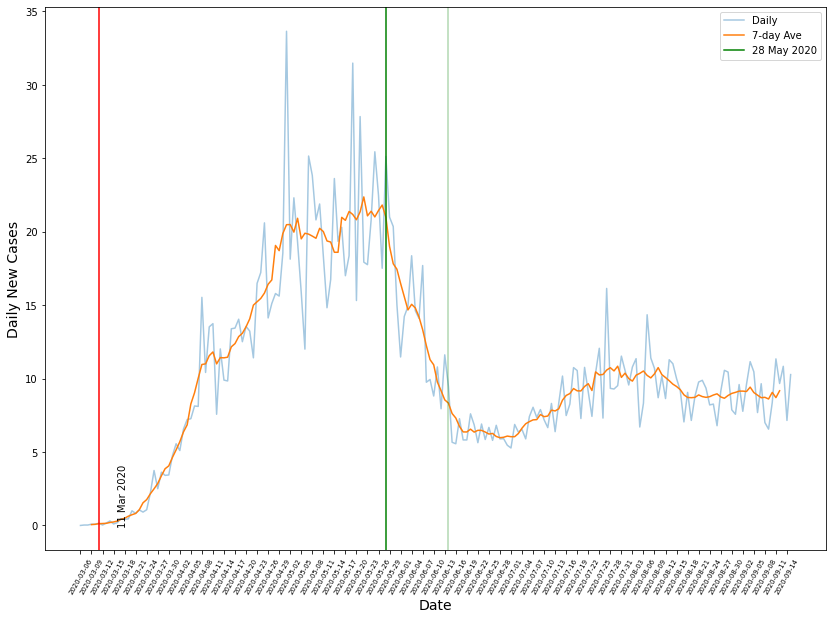

In [11]:
# bigger plot elements suitable for giving talks
#sns.set_context("talk")

# set figure size
fig = plt.figure(figsize=(14,10))

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",
             y="cases_pc",
             label="Daily", 
             data=df_covid_data_metrodc_bydate_diff,
             ci=None, 
             alpha=.4)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
plot_ = sns.lineplot(x="date",
                     y="cases_7d_pc",
                     label="7-day Ave",
                     data=df_covid_data_metrodc_bydate_diff)#,
                     #ci=None)
fig.canvas.draw()

plt.axvline('2020-03-11', color='r')
plt.text(10.1,0,'11 Mar 2020',rotation=90)

plt.axvline('2020-05-28', color='green', label="28 May 2020")

plt.axvline('2020-06-14', color='green', alpha=.31)

plt.legend()

# set axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 3), new_ticks[::3], rotation=60, fontweight='light', fontsize='x-small')

# plt.xticks(
#     rotation=90,
#     fontweight='light',
#     fontsize='x-small'
# )

# save image as PNG file
plt.savefig("Time_Series_Plot_with_7day_average_Seaborn.png",
                    format='png',
                    dpi=150)